# Demo how to combine measurements
We will do the following here:
1. Set up a fit model, generate some data and a likelihood function, and save it to a file.
2. Do the same with a second fit model.
3. Read both likelihood functions from the files, and combined them by adding the negative log-likelihood.
4. Create a profile log-likelihood to find the combined maximum-likelihood estimators.

## First Fit Model

In [1]:
using namespace RooFit;
RooRealVar mgg("mgg","mgg",-10,10);

RooRealVar mHiggs("mHiggs","mHiggs",-2.8,-10,10);
RooRealVar sHiggs("sHiggs","sHiggs",0.5,0.01,10);
RooGaussian sig("sig","sig",mgg,mHiggs,sHiggs);

RooRealVar a0("a0","a0",0.2,-1,1);
RooRealVar a1("a1","a1",-0.5,-1,1);
RooRealVar a2("a2","a2",0.02,-1,1);
RooChebychev bkg("bkg","bkg",mgg,RooArgList(a0,a1,a2));

RooRealVar nHiggs("nHiggs","nHiggs",500,-100.,1000.);
RooRealVar nBkg("nBkg","nBkg",5000,-100.,10000.);
RooAddPdf model("model","model",{sig,bkg},{nHiggs,nBkg});

RooDataSet* dataset = model.generate(mgg,NumEvents(2000),Name("data"));

model.fitTo(*dataset);
RooNLLVar nll("nllATLAS","nll",model,*dataset);


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (sig,bkg)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a0           2.00000e-01  2.00000e-01   -1.00000e+00  1.00000e+00
     2 a1          -5.00000e-01  2.00000e-01   -1.00000e+00  1.00000e+00
     3 a2           2.00000e-02  2.00000e-01   -1.00000e+00  1.00000e+00
     4 mHiggs      -2.80000e+00  2.0000

### Write it to a file

In [2]:
RooWorkspace atlas("atlas","atlas");
atlas.import(model);
atlas.import(*dataset);
atlas.import(nll);

TFile f("atlas.root","RECREATE");
atlas.Write();
f.Close();

[#1] INFO:ObjectHandling -- RooWorkspace::import(atlas) importing RooAddPdf::model
[#1] INFO:ObjectHandling -- RooWorkspace::import(atlas) importing RooGaussian::sig
[#1] INFO:ObjectHandling -- RooWorkspace::import(atlas) importing RooRealVar::mgg
[#1] INFO:ObjectHandling -- RooWorkspace::import(atlas) importing RooRealVar::mHiggs
[#1] INFO:ObjectHandling -- RooWorkspace::import(atlas) importing RooRealVar::sHiggs
[#1] INFO:ObjectHandling -- RooWorkspace::import(atlas) importing RooRealVar::nHiggs
[#1] INFO:ObjectHandling -- RooWorkspace::import(atlas) importing RooChebychev::bkg
[#1] INFO:ObjectHandling -- RooWorkspace::import(atlas) importing RooRealVar::a0
[#1] INFO:ObjectHandling -- RooWorkspace::import(atlas) importing RooRealVar::a1
[#1] INFO:ObjectHandling -- RooWorkspace::import(atlas) importing RooRealVar::a2
[#1] INFO:ObjectHandling -- RooWorkspace::import(atlas) importing RooRealVar::nBkg
[#1] INFO:ObjectHandling -- RooWorkspace::import(atlas) importing dataset data
[#1] INF

Let's inspect the workspace

In [3]:
atlas.Print()


RooWorkspace(atlas) atlas contents

variables
---------
(a0,a1,a2,mHiggs,mgg,nBkg,nHiggs,sHiggs)

p.d.f.s
-------
RooChebychev::bkg[ x=mgg coefList=(a0,a1,a2) ] = 1.45809
RooAddPdf::model[ nHiggs * sig + nBkg * bkg ] = 1.33113
RooGaussian::sig[ x=mgg mean=mHiggs sigma=sHiggs ] = 7.90803e-08

functions
--------
RooNLLVar::nllATLAS[ paramSet=(a0,a1,a2,mHiggs,nBkg,nHiggs,sHiggs) ] = 5848.92

datasets
--------
RooDataSet::data(mgg)



## Second fit model
Let's do all in on go.

In [4]:
using namespace RooFit;
RooRealVar mgg("mgg","mgg",-10,10);
RooRealVar mHiggs("mHiggs","mHiggs",-3.2,-10,10);
RooRealVar wHiggs("wHiggs","wHiggs",0.8,0.1,10);
RooRealVar sHiggs("sHiggs","sHiggs",0.3);
RooVoigtian sig("sig","sig",mgg,mHiggs,wHiggs,sHiggs);
RooRealVar slope("slope","slope",-0.2,-100,1);
RooExponential bkg("bkg","bkg",mgg,slope);
RooRealVar nHiggs("nHiggs","nHiggs",500,-500.,10000.);
RooRealVar nBkg("nBkg","nBkg",5000,0.,10000.);
RooAddPdf model("model","model",RooArgList(sig,bkg),RooArgList(nHiggs,nBkg));
RooDataSet* data = model.generate(mgg,NumEvents(2000),Name("data"));
model.fitTo(*data,Extended(),Minos(kFALSE));
RooNLLVar nll("nllCMS","nll",model,*data,Extended());

RooWorkspace cms("cms","cms");
cms.import(model);
cms.import(*data);
cms.import(nll);
cms.Print();
TFile f("cms.root","RECREATE");
cms.Write();
f.Close();

[#1] INFO:NumericIntegration -- RooRealIntegral::init(sig_Int[mgg]) using numeric integrator RooIntegrator1D to calculate Int(mgg)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(sig_Int[mgg]) using numeric integrator RooIntegrator1D to calculate Int(mgg)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(sig_Int[mgg]) using numeric integrator RooIntegrator1D to calculate Int(mgg)
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:NumericIntegration -- RooRealIntegral::init(sig_Int[mgg]) using numeric integrator RooIntegrator1D to calculate Int(mgg)
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (sig,bkg)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mHiggs      -3.20000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     2 nBkg         

## Combination
Open the files, get the likelihood functions and combine!

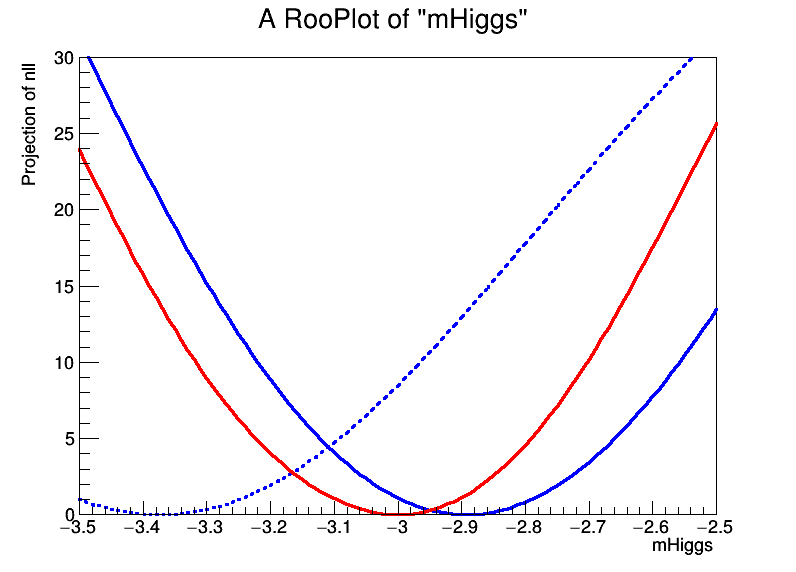

[#1] INFO:NumericIntegration -- RooRealIntegral::init(sig_Int[mgg]) using numeric integrator RooIntegrator1D to calculate Int(mgg)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(sig_Int[mgg]) using numeric integrator RooIntegrator1D to calculate Int(mgg)
[#0] ERROR:InputArguments -- RooArgSet::checkForDup: ERROR argument with name nBkg is already in this set
[#0] ERROR:InputArguments -- RooArgSet::checkForDup: ERROR argument with name nHiggs is already in this set
[#0] ERROR:InputArguments -- RooArgSet::checkForDup: ERROR argument with name sHiggs is already in this set
[#1] INFO:NumericIntegration -- RooRealIntegral::init(sig_Int[mgg]) using numeric integrator RooIntegrator1D to calculate Int(mgg)
[#1] INFO:Minimization -- RooProfileLL::evaluate(pllCombi) Creating instance of MINUIT
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nllCombi) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooProfileLL::evaluate(pllCombi) determining minimum lik

In [5]:
TFile f1("atlas.root") ;
RooWorkspace *atlas = f1.Get<RooWorkspace>("atlas");
TFile f2("cms.root");
RooWorkspace *cms = f2.Get<RooWorkspace>("cms");

auto nll_atlas = atlas->function("nllATLAS");
auto nll_cms = cms->function("nllCMS");
RooRealVar * mHiggs = atlas->var("mHiggs");

auto c = new TCanvas("c", "c", 800, 600);
auto mframe = mHiggs->frame(-3.5,-2.5);
nll_atlas->plotOn(mframe, ShiftToZero());
nll_cms->plotOn(mframe, LineStyle(kDashed), ShiftToZero());

RooAddition nllCombi("nllCombi","nll CMS&ATLAS",
   RooArgList(*nll_cms, *nll_atlas));


RooProfileLL pllCombi("pllCombi", "pll", nllCombi, RooArgSet(*mHiggs));
pllCombi.plotOn(mframe, LineColor(kRed));

mframe->SetMinimum(0.);
mframe->SetMaximum(30.);
mframe->Draw();

c->Draw();